# **Mall Customers Clustering Analysis**


### The  dataset is taken from Kaggle and stored at github. In this analysis we are finding the buying behaviour of customers with respect to their annual earnings.



**Installing the Libraries**

In [ ]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff



**Reading the Dataset**

In [ ]:
# importing the dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rumsha001/ML2/main/dataset/Mall_Customers.csv')

#Printing first 5 rows
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#changing column name
data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
# describing the data
data.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# checking if there is any NULL data
data.isnull().any().any()

False

## Data Visualization

### Using pairplot to visualize given data to find the relationship between them where the variables can be continuous or categorical.
### From this we would be able to figure out that there is some relatonship between customerID, score, and income.


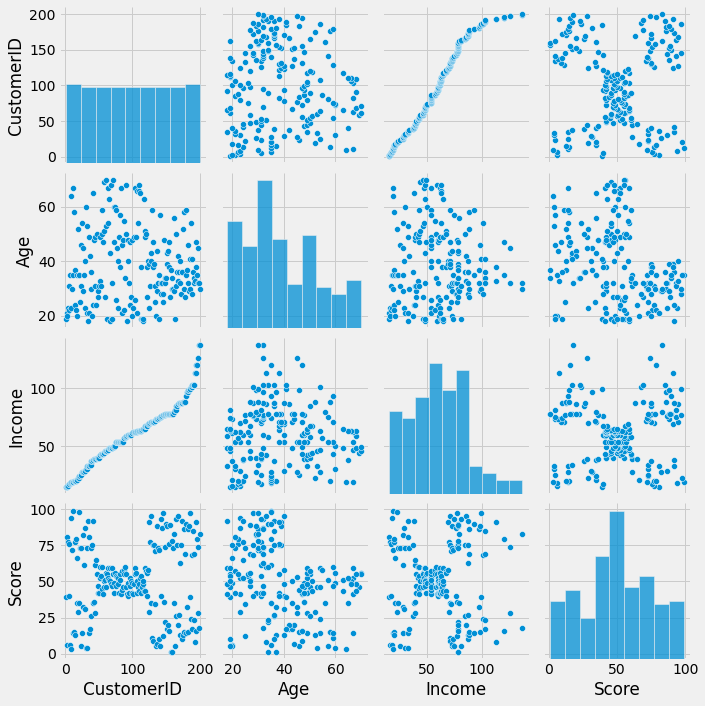

In [ ]:
#Using Pairplot
sns.pairplot(data)
plt.show()

### **Visualizing Gender relationship**
Here, I can also choose one-hot encoding for "Gender" since it is the only categorical column and later I would like to normalize data.
But Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together.
It means that our data is not gender biased and we can drop it.


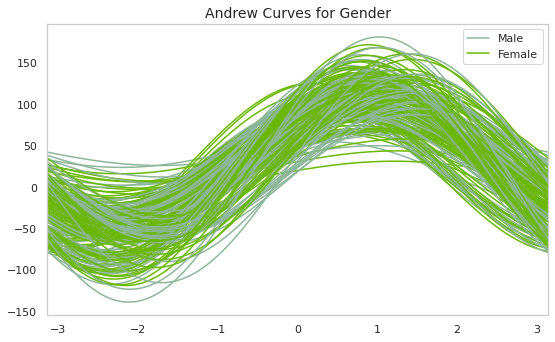

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)
plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 14)
plt.show()

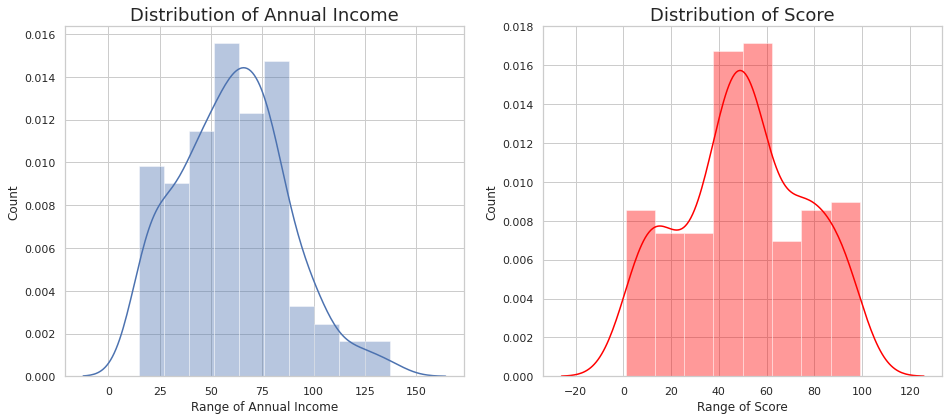

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (14, 6)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Income'])
plt.title('Distribution of Annual Income', fontsize = 18)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Score'], color = 'red')
plt.title('Distribution of Score', fontsize = 18)
plt.xlabel('Range of Score')
plt.ylabel('Count')
plt.show()

> Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots, 

>> we can infer one thing that There are few people who earn more than 100 US Dollars.
>> Most of the people have an earning of around 50-75 US Dollars.
>> Also, we can say that the least Income is around 20 US Dollars.

> Taking inferences about the Scores.
>> It is almost a normal distribution but due to smaller peaks on tails, we can confirm it. However, the spending score showing the range from 1-100 depicts that only 20% of the people spent highest i.e. 40-60.
>> Where as the remaining people either spend more that 60 or less than 40.


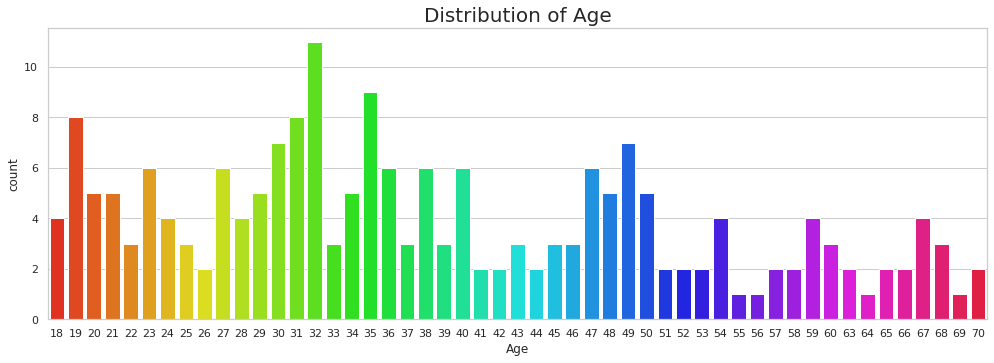

In [ ]:
#Showing Age distribution
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

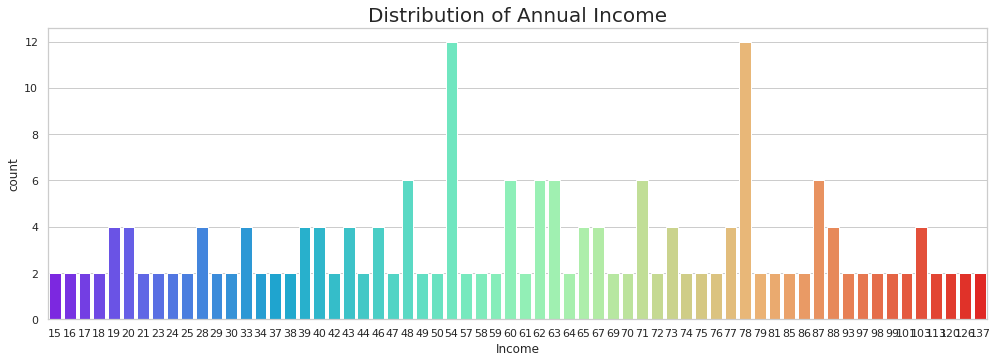

In [ ]:
#Showing Income distribution
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['Income'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

## **Clustering Analysis**

In [ ]:
# Since we know that Gender has no reflection on data so we are dropping Gender
# Also, using pairplot we witnessed that Score and Income has some relationship therefore, we are dropping Age and Customer ID as well

data1 = data.drop(['CustomerID', 'Gender','Age'], axis=1)

#Scaling data
#Importing the library
from sklearn import preprocessing

#Passing the values of the dataset to Min-Max-Scaler

min_max_scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
x_scaled = min_max_scaler.fit_transform(data1.values)
X = pd.DataFrame(x_scaled, columns=data1.columns)
X.head()

,Income,Score
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

This is really fun. First, I found out Inertia and no. of Clusters then I added arrows by taking the exact value where I found a significant change in inertia.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0) [23.040720326039906, 13.993505283127977, 9.058985215159453, 6.110312266413655, 3.5831179059525606, 3.098385141882586, 2.6256505791339744, 2.2210608257935256, 1.8882982081842279, 1.6576314738995253]


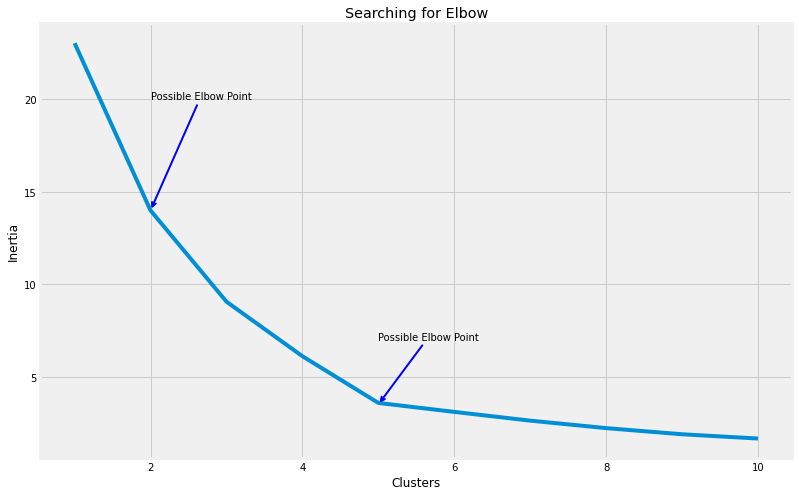

In [ ]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
print(km,clusters)
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# # # Annotate arrow
ax.annotate('Possible Elbow Point', xy=(2, 14), xytext=(2, 20), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 3.5), xytext=(5, 7), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



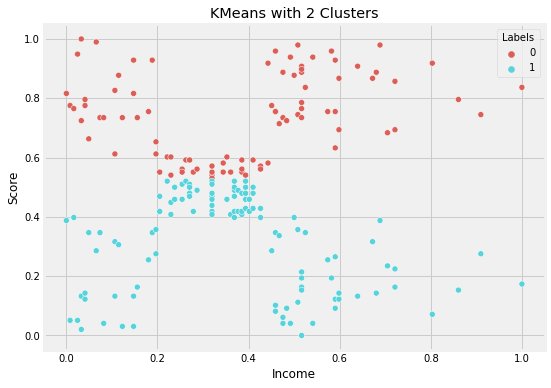

In [ ]:
# 2 cluster
km2 = KMeans(n_clusters=2).fit(X)
X['Labels'] = km2.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 2))
plt.title('KMeans with 2 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



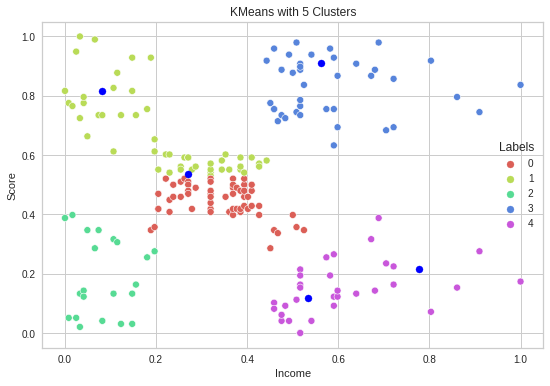

In [ ]:
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.scatter(km.cluster_centers_[:5,0], km.cluster_centers_[:5, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('KMeans with 5 Clusters')
plt.show()

> By judging from the plots we could say that 5 cluster seems better than the 2 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

Label 0 is low to average income and high spending

Label 1 is low income and low spending

Label 2 is average income and high spending

Label 3 is low income and  high spending

Label 4 is high income and low spending

## **Silhouette Score**
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
* 1: Means clusters are well apart from each other and clearly distinguished.
* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
* -1: Means clusters are assigned in the wrong way.

Silhouetter Score: 0.838


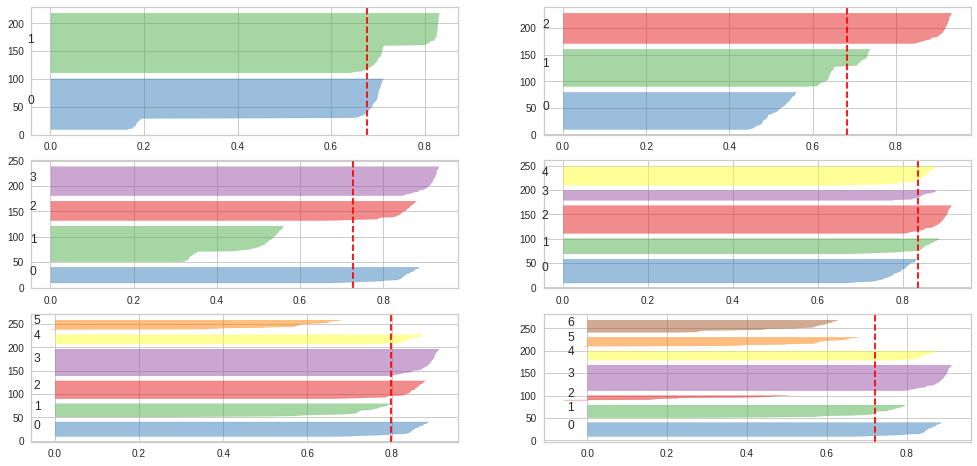

In [ ]:
from sklearn.metrics import silhouette_score as s
from yellowbrick.cluster import SilhouetteVisualizer

score = s(X, km5.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    # Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance
    # Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

> ### **Silhouette analysis**

The Silhouetter Score: 0.838 means that our clusters are almost well apart from each other.

Interpretations from Plot no. 2:
* This plot is seems to be an optimal choice because the thickness of both clusters are same and they are above average.

Plot no . 5:
* Presence of clusters above average score except 1 but it also close to average. 
* Wide Fluctuations and thickness is almost similar representing each cluster is also a deciding point.

**Since our 0.838 score show that clusters are widely separated that means n_cluster=5 is a good choice.**

Plot no 3,4,6,7:
* All of them are representing clusters far below average

## **Agglomerative Hierarchical Clustering**
The Agglomerative Clustering class will require two inputs:

n_clusters: The number of clusters to form as well as the number of centroids to generate.
linkage: The algorithm will merge the pairs of cluster that minimize this criterion.


1.   ‘ward’ minimizes the variance of the clusters being merged.

2.   ‘average’ uses the average of the distances of each observation of the two sets.
3.   ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
4.   ‘single’ uses the minimum of the distances between all observations of the two sets.

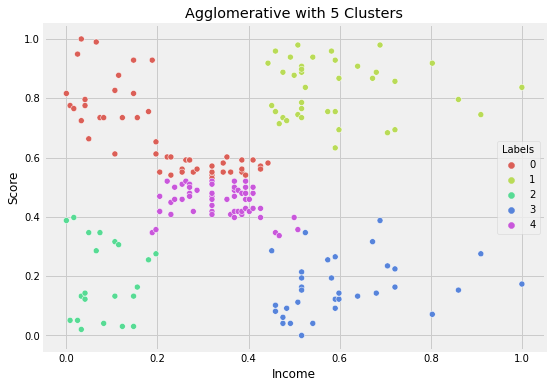

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

Showing 0s in diagonal
 [[0.         2.04540301 0.33683444 ... 1.39833926 1.43035603 1.48377312]
 [2.04540301 0.         2.14143892 ... 1.35384774 3.22695914 1.41436081]
 [0.33683444 2.14143892 0.         ... 1.51473416 1.41374237 1.61276802]
 ...
 [1.39833926 1.35384774 1.51473416 ... 0.         2.08198467 0.12869934]
 [1.43035603 3.22695914 1.41374237 ... 2.08198467 0.         2.10711197]
 [1.48377312 1.41436081 1.61276802 ... 0.12869934 2.10711197 0.        ]]


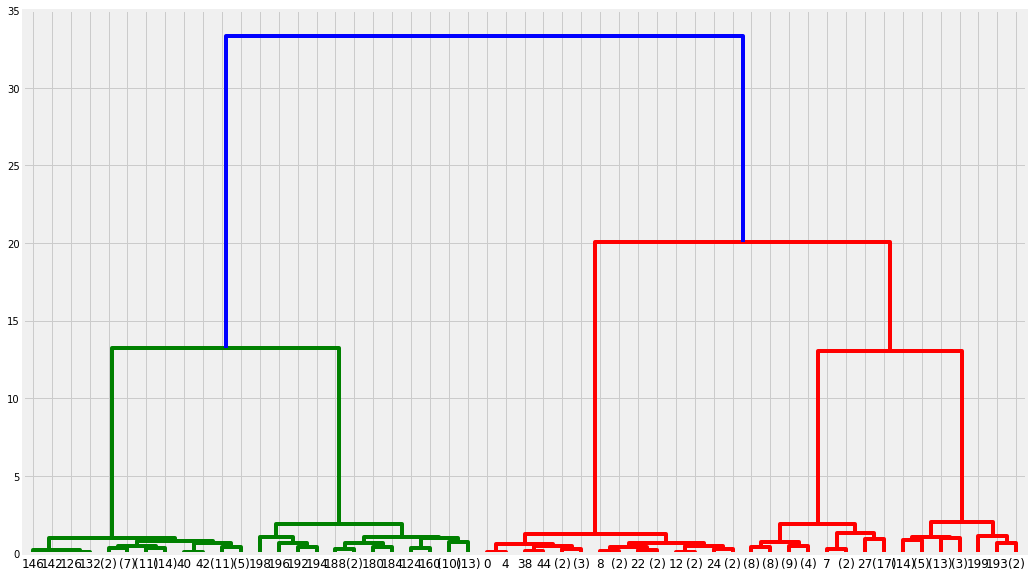

In [ ]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print("Showing 0s in diagonal\n",dist)
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(16, 10))

#Showing only TOP 5 LEVELS
dendro = hierarchy.dendrogram(Z, p=5, truncate_mode='level',leaf_rotation=0, leaf_font_size=12, orientation='top')

## **Density Based Clustering (DBSCAN)**
Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.
It works based on two parameters: Epsilon and Minimum Points
1.  Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
2.  minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)


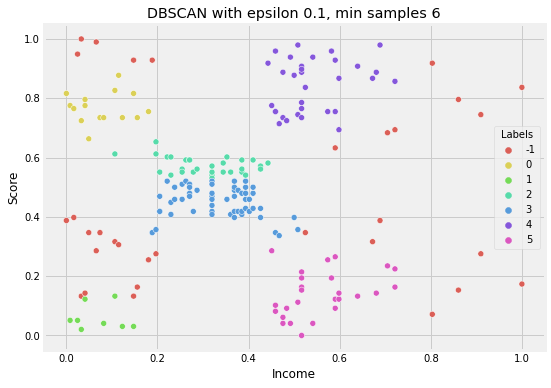

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=0.1, min_samples=8).fit(X)
print(db)
X['Labels'] = db.labels_
# print(db.labels_)
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 0.1, min samples 6')
plt.show()

As we can see here that DBScan didnot perform well because there so many outliers in this clustering.

## **Mean Shift Algorithm**
It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

* The algorithm automatically sets the number of clusters
* H*owever, the algo estimates the bandwidth but quantile variable has an effect on setting the bandwidth manually. I have tested using multiple inputs for quantile and found that 0.18 is the most suitable.*



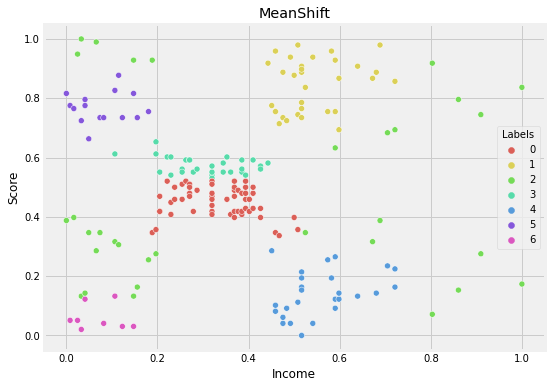

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.18)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

## **Conclusion**



> So far I have implemented 4 most popular clustering algorithms: **Kmeans, Aggleromative, DBScan and Mean Shift.**


> Using elbow method, I found that customers' data on the basis of their annual income and expenditure, can be divided into 5 clusters.
In both Kmeans and Aggleromative Clustering, the formation of clusters were clean and same while few outliers can be seen vividly.

**While there are 2 clusters in KMeans which are sparsely distributed but in Aggleromative there is only 1 cluster with such behaviour. Hence, Aggleromative has done a better job here.**

> In DBScan, I have set a low value of epsilon and keep minimum no. of samples to 6. Here the algorithm made 6 clusters and also identified outliers.
Due to outliers present in DBScan clustering we can't say that it has done a good job here.



> In MeanShift Clustering, it has generated 8 clusters automatically. Some are dense and some are sparse. Also, according to silhoutte's plots it was evident that n_cluster=8 is not an optimal choice.

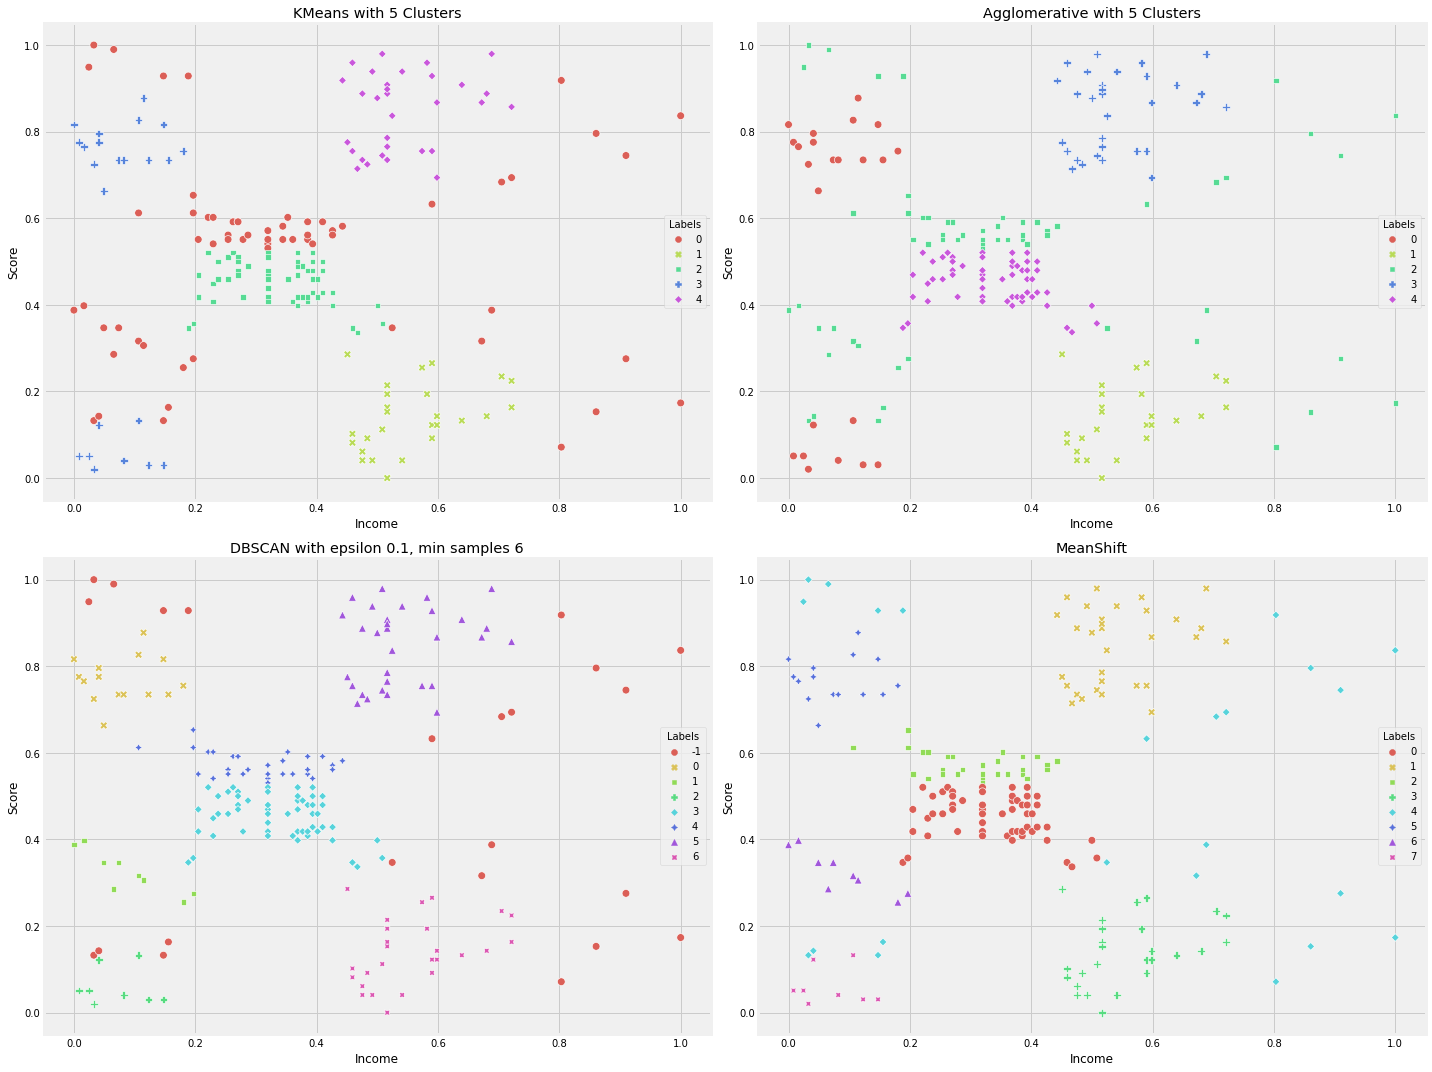

In [ ]:
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=0.1, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 0.1, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.18)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()